# Project 3 Part 1 Core
**Student:** Matthew Malueg

## Imports, Loading, and Preparation

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import holidays
import datetime as dt
import glob
from holidays import country_holidays
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
# Customize figure style for stakeholder-facing visualizations
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (12,4)
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
sns.set_context("talk", font_scale=0.9)
pd.set_option('display.max_columns',50)

**Load and concatenate Chicago yearly crime files**

In [2]:
folder = 'Data/Chicago/'
crime_files = sorted(glob.glob(folder+'*.csv'))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

**Convert Date to DateTime type and set as index**

- NOTE: This conversion below took ~5 minutes to complete

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

ID     Primary Type          Description  \
Date                                                                 
2001-01-01 01:00:00  1326041          BATTERY               SIMPLE   
2001-01-01 13:00:00  1319931          BATTERY               SIMPLE   
2001-01-01 13:00:00  1324743         GAMBLING  ILLEGAL ILL LOTTERY   
2001-01-01 01:00:00  1310717  CRIMINAL DAMAGE           TO VEHICLE   
2001-01-01 01:00:00  1318099          BATTERY               SIMPLE   

                        Location Description  Arrest  Domestic  Beat  \
Date                                                                   
2001-01-01 01:00:00                RESIDENCE   False     False  1624   
2001-01-01 13:00:00                RESIDENCE   False      True   825   
2001-01-01 13:00:00                   STREET    True     False   313   
2001-01-01 01:00:00                   STREET   False     False  2424   
2001-01-01 01:00:00  RESIDENCE PORCH/HALLWAY   False      True   214   

                     District  Ward   Latitude  Longitude  
Date                                                       
2001-01-01 01:00:00      16.0   NaN  41.957850 -87.749185  
2001-01-01 13:00:00       8.0   NaN  41.783892 -87.684841  
2001-01-01 13:00:00       3.0   NaN  41.780412 -87.611970  
2001-01-01 01:00:00      24.0   NaN  42.012391 -87.678032  
2001-01-01 01:00:00       2.0   NaN  41.819538 -87.620020

## Topics for Analysis

### Topic 1) Comparing Police Districts

- A. Which district had the most crimes in 2022?
- B. Which district had the least crimes in 2022?

In [5]:
# Limit the df to Year 2022
df_t1 = df.loc['2022']
df_t1.tail(2)

ID        Primary Type  \
Date                                                
2022-12-31 12:52:00  12938420             ASSAULT   
2022-12-31 12:59:00  12939906  DECEPTIVE PRACTICE   

                                                 Description  \
Date                                                           
2022-12-31 12:52:00                                   SIMPLE   
2022-12-31 12:59:00  FINANCIAL IDENTITY THEFT $300 AND UNDER   

                             Location Description  Arrest  Domestic  Beat  \
Date                                                                        
2022-12-31 12:52:00  COMMERCIAL / BUSINESS OFFICE   False     False  1432   
2022-12-31 12:59:00                     RESIDENCE   False     False  1511   

                     District  Ward   Latitude  Longitude  
Date                                                       
2022-12-31 12:52:00      14.0  32.0  41.930693 -87.685657  
2022-12-31 12:59:00      15.0  29.0        NaN        NaN

In [6]:
# Group the crimes by district
t1_ts = df_t1.groupby('District').count()
# Display the dataframe, grouped by District and sorted by crime totals
t1_ts.sort_values('Primary Type', ascending=False)

ID  Primary Type  Description  Location Description  Arrest  \
District                                                                   
8.0       14805         14805        14805                 14770   14805   
6.0       14694         14694        14694                 14657   14694   
12.0      14341         14341        14341                 14270   14341   
4.0       13931         13931        13931                 13905   13931   
11.0      13457         13457        13457                 13436   13457   
1.0       13044         13044        13044                 12986   13044   
18.0      12429         12429        12429                 12358   12429   
19.0      12243         12243        12243                 12124   12243   
25.0      11951         11951        11951                 11920   11951   
3.0       11937         11937        11937                 11912   11937   
2.0       11793         11793        11793                 11753   11793   
9.0       10376         10376        10376                 10349   10376   
7.0       10319         10319        10319                 10305   10319   
10.0       9961          9961         9961                  9949    9961   
5.0        9773          9773         9773                  9760    9773   
16.0       9226          9226         9226                  9173    9226   
24.0       8469          8469         8469                  8433    8469   
15.0       8308          8308         8308                  8291    8308   
14.0       8158          8158         8158                  8094    8158   
22.0       7671          7671         7671                  7650    7671   
17.0       6997          6997         6997                  6967    6997   
20.0       4960          4960         4960                  4934    4960   
31.0         15            15           15                    15      15   

          Domestic   Beat   Ward  Latitude  Longitude  
District                                               
8.0          14805  14805  14805     14512      14512  
6.0          14694  14694  14694     14500      14500  
12.0         14341  14341  14341     13958      13958  
4.0          13931  13931  13931     13734      13734  
11.0         13457  13457  13457     12903      12903  
1.0          13044  13044  13044     12533      12533  
18.0         12429  12429  12429     12050      12050  
19.0         12243  12243  12243     11802      11802  
25.0         11951  11951  11951     11706      11706  
3.0          11937  11937  11937     11760      11760  
2.0          11793  11793  11793     11522      11522  
9.0          10376  10376  10376     10192      10192  
7.0          10319  10319  10319     10172      10172  
10.0          9961   9961   9961      9803       9803  
5.0           9773   9773   9773      9631       9631  
16.0          9226   9226   9221      8739       8739  
24.0          8469   8469   8464      8272       8272  
15.0          8308   8308   8308      8200       8200  
14.0          8158   8158   8158      7911       7911  
22.0          7671   7671   7671      7519       7519  
17.0          6997   6997   6997      6836       6836  
20.0          4960   4960   4960      4815       4815  
31.0            15     15     15        15         15

**Conclusions**
- A) The district with the most crimes in 2022 was District 8, with 14,805 crimes reported.
- B) The district with the least crimes reported in 2022 was District 31, with 15 crimes reported.

### Topic 2) Crimes Across the Years

- A) Is the total number of crimes increasing or decreasing across the years?
- B) Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [7]:
df.head()

ID     Primary Type          Description  \
Date                                                                 
2001-01-01 01:00:00  1326041          BATTERY               SIMPLE   
2001-01-01 13:00:00  1319931          BATTERY               SIMPLE   
2001-01-01 13:00:00  1324743         GAMBLING  ILLEGAL ILL LOTTERY   
2001-01-01 01:00:00  1310717  CRIMINAL DAMAGE           TO VEHICLE   
2001-01-01 01:00:00  1318099          BATTERY               SIMPLE   

                        Location Description  Arrest  Domestic  Beat  \
Date                                                                   
2001-01-01 01:00:00                RESIDENCE   False     False  1624   
2001-01-01 13:00:00                RESIDENCE   False      True   825   
2001-01-01 13:00:00                   STREET    True     False   313   
2001-01-01 01:00:00                   STREET   False     False  2424   
2001-01-01 01:00:00  RESIDENCE PORCH/HALLWAY   False      True   214   

                     District  Ward   Latitude  Longitude  
Date                                                       
2001-01-01 01:00:00      16.0   NaN  41.957850 -87.749185  
2001-01-01 13:00:00       8.0   NaN  41.783892 -87.684841  
2001-01-01 13:00:00       3.0   NaN  41.780412 -87.611970  
2001-01-01 01:00:00      24.0   NaN  42.012391 -87.678032  
2001-01-01 01:00:00       2.0   NaN  41.819538 -87.620020

In [8]:
# Group the data by year using datetime index
df_t2 = df[['Primary Type']].copy()
df_t2['Year'] = df_t2.index.year
# Get a total number of crimes for each year
t2_ts = df_t2.groupby('Primary Type')['Year'].value_counts().sort_index()
# Save crime numbers in a dataframe for plotting and reset the index
plot_t2 = t2_ts.to_frame('# of Crimes').reset_index()
plot_t2

Primary Type  Year  # of Crimes
0                ARSON  2001         1011
1                ARSON  2002         1032
2                ARSON  2003          955
3                ARSON  2004          778
4                ARSON  2005          691
..                 ...   ...          ...
684  WEAPONS VIOLATION  2018         5456
685  WEAPONS VIOLATION  2019         6339
686  WEAPONS VIOLATION  2020         8432
687  WEAPONS VIOLATION  2021         8980
688  WEAPONS VIOLATION  2022         8766

[689 rows x 3 columns]

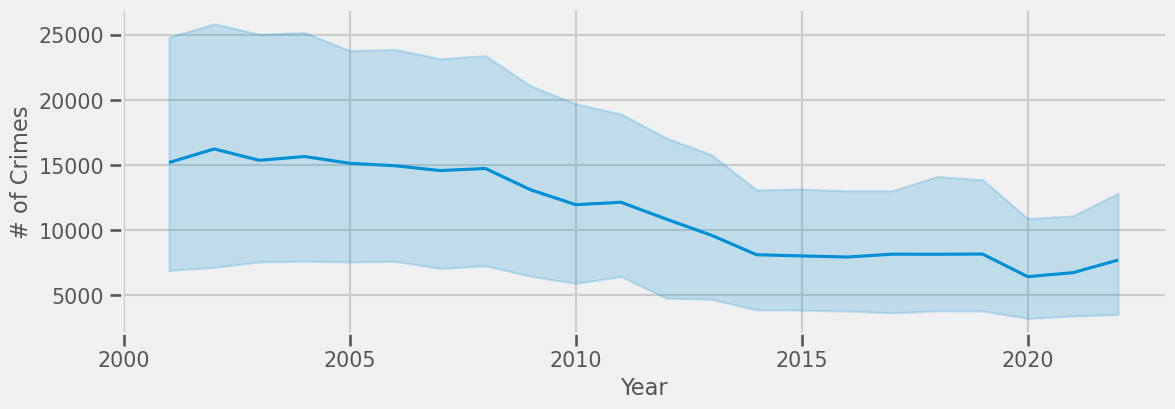

In [9]:
# Check the trend of overall total crimes
ax = sns.lineplot(data=plot_t2, x='Year', y='# of Crimes');

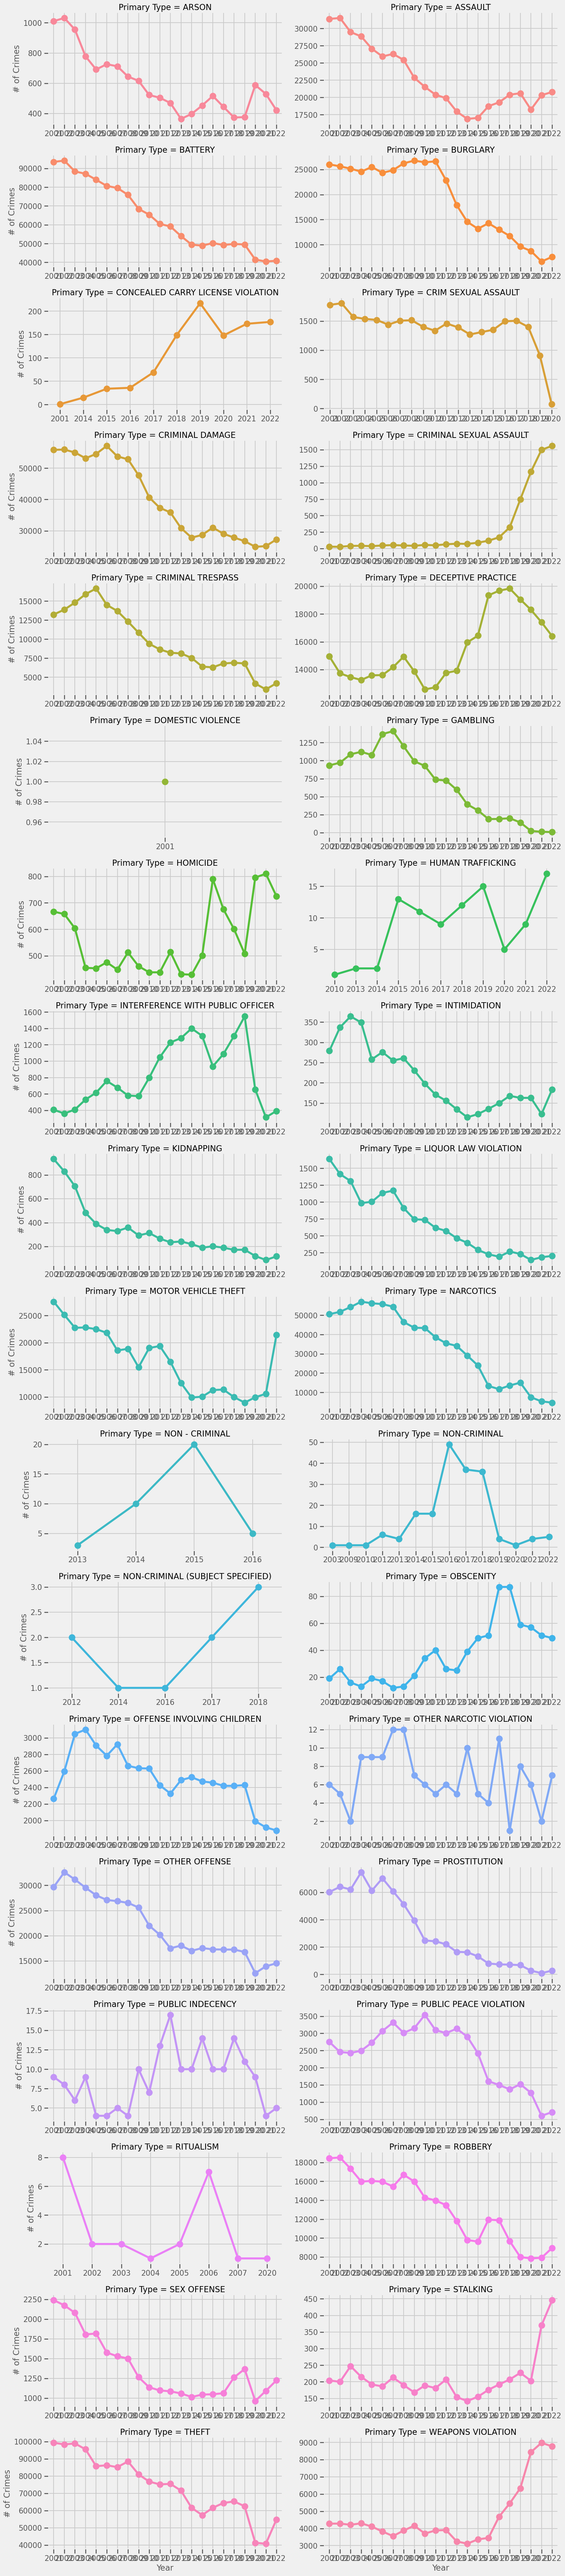

In [10]:
# Plot each type of crime individually to see if the trend is upwards or downwards over the time period
g = sns.catplot(data=plot_t2, x='Year', y='# of Crimes',
                kind='point', aspect=2, height=4,
                hue='Primary Type', col='Primary Type', col_wrap=2,
                sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

**Conclusions**

- A) The data seems to show a decrease in the overall number of crimes from 2001-present.
- B) There are a number of crimes that have seen a rise in recent years, despite an overall downward trend. Those crimes are:

  - Concealed Carry License Violations
  - Deceptive Practice
  - Human Trafficking
  - Homicide
  - Obscenity
  - Stalking
  - Weapons Violations
  - Other notes:
      - 'Interference with a public officer' saw a steady climb from ~400 cases to ~ 1500, peaking in 2018, then fell precipitously.
      - Although 'CRIMINAL SEXUAL ASSAULT' rose sharply over the past few years, there is a counterpart with slightly different formatting ('CRIM SEXUAL ASSAULT') displaying the inverse trend.

### Topic 5) Comparing Holidays

- A) What are the top 3 holidays with the largest number of crimes committed?
- B) For each of the top 3 holidays with the most crimes, what are the top 5 most common crimes on that holiday?

In [11]:
# Get a list of holidays
us_holidays = country_holidays("US")
# add col to df containing US holiday binary info
df['US Holiday'] = [us_holidays.get(day) for day in df.index.date]

In [12]:
# Get value_counts on df['holidays'] to see 3 highest crime holidays
df['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

- The holidays with the highest recorded crimes are:
    - New Year's Day
    - Independence Day
    - Labor Day

In [13]:
## Check values of specific crimes for each holiday
# Create a frame with only crimes committed on required holidays
holiday_crime = df.groupby("US Holiday")['Primary Type'].value_counts()
holiday_crime = holiday_crime.to_frame('# of Crimes Reported')

In [14]:
## Check top 5 crimes for each of the top 3 holidays
# New Year's Day
holiday_crime.loc["New Year's Day"].head(5)

# of Crimes Reported
Primary Type                                    
THEFT                                       6845
BATTERY                                     6043
CRIMINAL DAMAGE                             3236
DECEPTIVE PRACTICE                          2934
OFFENSE INVOLVING CHILDREN                  2380

In [15]:
# Independence Day
holiday_crime.loc["Independence Day"].head(5)

# of Crimes Reported
Primary Type                         
BATTERY                          5805
THEFT                            4074
CRIMINAL DAMAGE                  3309
ASSAULT                          1547
NARCOTICS                        1522

In [16]:
# Labor Day
holiday_crime.loc["Labor Day"].head(5)

# of Crimes Reported
Primary Type                         
BATTERY                          4607
THEFT                            4520
CRIMINAL DAMAGE                  2475
NARCOTICS                        2078
ASSAULT                          1525

**Conclusions**
- A) The 3 holidays with the highest number of reported crimes were New Year's Day, Independence Day, and Labor Day.
- B) In all 3 cases, the top 3 crimes consisted of Battery, Theft, and Criminal Damage.
    - New Year's Day had Deceptive Practice followed by Offense Involving Children as the fourth and fifth most commonly reported crimes.
    - Independence Day had Assault followed by Narcotics as the fourth and fifth most common, with Labor Day having the same two but reverse order.